In [1]:
from sklearn import datasets
# Load the Iris dataset
iris = datasets.load_iris()

In [2]:
from sklearn.datasets import fetch_openml
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

In [3]:
# Display the shape of the dataset (number of instances, number of features)
print("Data shape:", mnist.data.shape)
# Display the shape of the target (number of labels)
print("Target shape:", mnist.target.shape)

Data shape: (70000, 784)
Target shape: (70000,)


In [8]:
X = iris.data  # Features
y = iris.target  # Target variable

In [9]:
from sklearn.model_selection import train_test_split
# Assuming X is your features and y is your target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [11]:
iris = load_iris()
X, y = iris.data, iris.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
# Assuming iris is loaded as before
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
# Splitting the data
X = data.iloc[:, :-1] # All rows, all columns except the last
y = data.iloc[:, -1] # All rows, last column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import load_iris
import numpy as np

In [13]:
import pandas as pd
import numpy as np
# Assuming iris is loaded as before
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
# Splitting the data
X = data.iloc[:, :-1] # All rows, all columns except the last
y = data.iloc[:, -1] # All rows, last column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
iris = load_iris()
X, y = iris.data, iris.target

In [15]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [16]:
for train_index, test_index in sss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

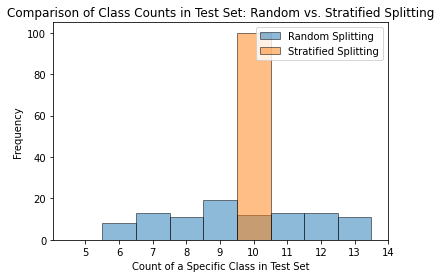

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Simulating random test counts and stratified test counts for demonstration
np.random.seed(42)  # For reproducibility
random_test_counts = np.random.randint(low=6, high=14, size=100)  # Simulated counts for random splitting
stratified_test_counts = np.full(shape=100, fill_value=10)  # Simulated constant count for stratified splitting

# Plotting the histograms
plt.hist(random_test_counts, alpha=0.5, label='Random Splitting', bins=np.arange(5, 15) - 0.5, edgecolor='black')
plt.hist(stratified_test_counts, alpha=0.5, label='Stratified Splitting', bins=np.arange(5, 15) - 0.5, edgecolor='black')
plt.legend(loc='upper right')
plt.xlabel('Count of a Specific Class in Test Set')
plt.ylabel('Frequency')
plt.title('Comparison of Class Counts in Test Set: Random vs. Stratified Splitting')
plt.xticks(np.arange(5, 15))
plt.show()


In [19]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

In [20]:
print(data.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


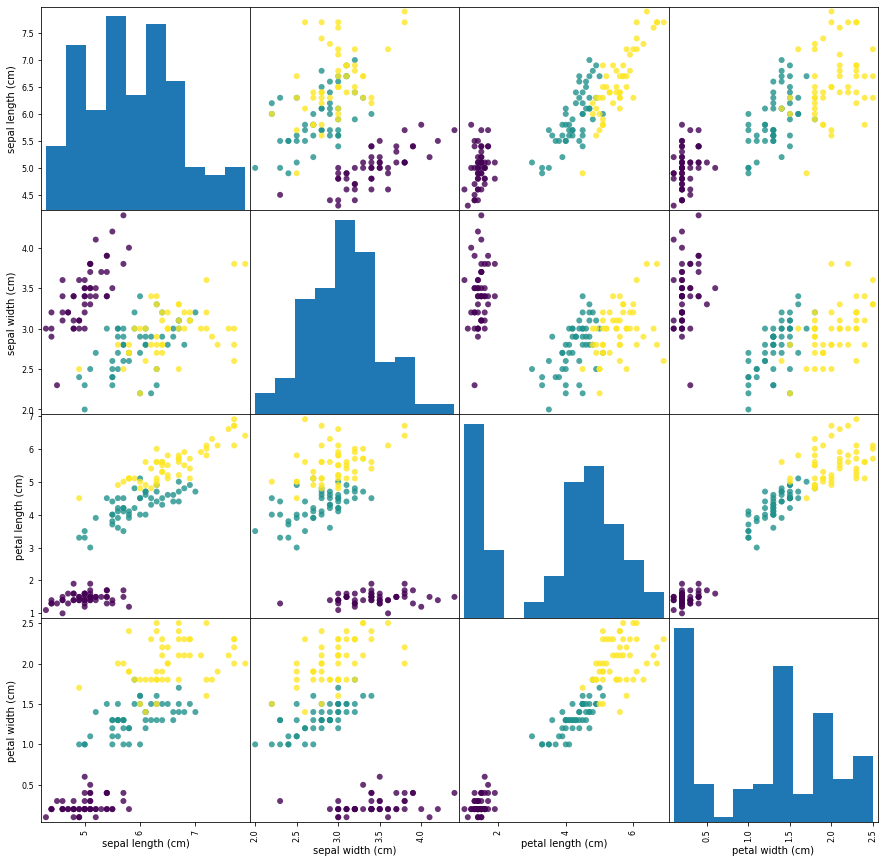

In [21]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(data.iloc[:, :-1], c=data['target'], figsize=(15, 15), marker='o', alpha=0.8)
plt.show()

In [22]:
print(data.corr())

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


In [23]:
data['petal_width_length_ratio'] = data['petal width (cm)'] / data['petal length (cm)']
data['sepal_width_length_ratio'] = data['sepal width (cm)'] / data['sepal length (cm)']

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(data.iloc[:, :-1], data['target']):
  X_train, X_test = data.iloc[train_index, :-1], data.iloc[test_index, :-1]
  y_train, y_test = data['target'][train_index], data['target'][test_index]

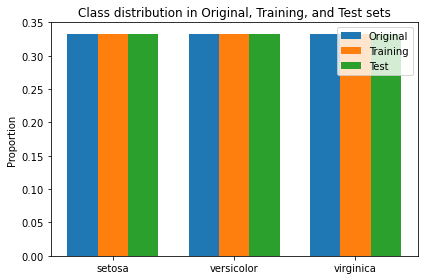

In [25]:
# Count the occurrences of each class in the original, training, and test sets
original_counts = data['target'].value_counts().sort_index()
train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()

# Normalize the counts to get the proportion of each class
original_props = original_counts / original_counts.sum()
train_props = train_counts / train_counts.sum()
test_props = test_counts / test_counts.sum()

# Plotting
labels = iris.target_names
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, original_props, width, label='Original')
rects2 = ax.bar(x, train_props, width, label='Training')
rects3 = ax.bar(x + width, test_props, width, label='Test')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Proportion')
ax.set_title('Class distribution in Original, Training, and Test sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()